In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import os

In [2]:
#os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"]="/device:GPU:0"

In [3]:
df=pd.read_csv('SVMDATA.csv')

# Preprocessing

In [4]:
df.head()

,Elevation,LST,Label,X_Coor,Y_Coor,b1,b1ASM,b1Energy,b1Entropy,b1Homogeneity,...,maxProbility,ndsi,ndvi,ndwi,newbandR,pointid,"Scored Probabilities for Class ""0""","Scored Probabilities for Class ""1""","Scored Probabilities for Class ""2""",Scored Labels
0,5337,-2.322263,2,74.565097,36.571428,0.70825,4.000000,2.000000,-1.386294,2.000000,...,0.0,0.847585,-0.051304,-0.063502,0.054324,1351357,4.026224e-17,2.102286e-15,1.000000,2
1,5212,-8.020569,2,74.301768,36.590170,0.73150,4.000000,2.000000,-1.386294,2.000000,...,0.0,0.950797,-0.070857,-0.044166,0.016529,664406,5.748423e-14,3.250726e-16,1.000000,2
2,4140,-5.473418,2,74.465483,36.580835,0.27325,0.458333,0.677003,3.062529,1.100000,...,0.0,0.850385,-0.054393,-0.040133,0.020492,1094299,1.181146e-08,2.111576e-04,0.999789,2
3,4457,4.297067,2,74.495309,36.588638,0.19340,0.277778,0.527046,4.045617,0.498643,...,0.0,0.019321,0.017964,0.082261,0.173628,831056,2.616376e-07,3.322035e-02,0.966779,2
4,5357,-5.766243,2,74.665732,36.607526,0.12120,4.000000,2.000000,-1.386294,2.000000,...,0.0,0.789179,-0.085010,0.183594,0.009529,282377,1.141957e-10,4.357206e-14,1.000000,2


In [5]:
df=df.drop(['pointid','Scored Probabilities for Class "0"','Scored Probabilities for Class "1"','Scored Probabilities for Class "2"','Scored Labels'], axis=1)

In [6]:
df.head()

,Elevation,LST,Label,X_Coor,Y_Coor,b1,b1ASM,b1Energy,b1Entropy,b1Homogeneity,...,b6Mean,b6contrast,b6dissimilarity,b6maxProbility,b6variance,maxProbility,ndsi,ndvi,ndwi,newbandR
0,5337,-2.322263,2,74.565097,36.571428,0.70825,4.000000,2.000000,-1.386294,2.000000,...,681.9167,1.500000,1.5,0.75,0.998900,0.0,0.847585,-0.051304,-0.063502,0.054324
1,5212,-8.020569,2,74.301768,36.590170,0.73150,4.000000,2.000000,-1.386294,2.000000,...,185.7500,1.500000,1.5,0.75,0.995962,0.0,0.950797,-0.070857,-0.044166,0.016529
2,4140,-5.473418,2,74.465483,36.580835,0.27325,0.458333,0.677003,3.062529,1.100000,...,328.2500,2.166667,1.5,0.50,0.996700,0.0,0.850385,-0.054393,-0.040133,0.020492
3,4457,4.297067,2,74.495309,36.588638,0.19340,0.277778,0.527046,4.045617,0.498643,...,1095.4166,77.166664,11.5,0.25,0.964777,0.0,0.019321,0.017964,0.082261,0.173628
4,5357,-5.766243,2,74.665732,36.607526,0.12120,4.000000,2.000000,-1.386294,2.000000,...,91.5000,1.000000,1.0,1.00,0.994536,0.0,0.789179,-0.085010,0.183594,0.009529


In [7]:
labels=df["Label"]

In [8]:
labels=list(labels)
labels[0:10]

[2, 2, 2, 2, 2, 2, 1, 2, 1, 2]

In [9]:
df=df.drop(["Label"],axis=1)

In [10]:
df.head()

,Elevation,LST,X_Coor,Y_Coor,b1,b1ASM,b1Energy,b1Entropy,b1Homogeneity,b1Mean,...,b6Mean,b6contrast,b6dissimilarity,b6maxProbility,b6variance,maxProbility,ndsi,ndvi,ndwi,newbandR
0,5337,-2.322263,74.565097,36.571428,0.70825,4.000000,2.000000,-1.386294,2.000000,62.000000,...,681.9167,1.500000,1.5,0.75,0.998900,0.0,0.847585,-0.051304,-0.063502,0.054324
1,5212,-8.020569,74.301768,36.590170,0.73150,4.000000,2.000000,-1.386294,2.000000,62.000000,...,185.7500,1.500000,1.5,0.75,0.995962,0.0,0.950797,-0.070857,-0.044166,0.016529
2,4140,-5.473418,74.465483,36.580835,0.27325,0.458333,0.677003,3.062529,1.100000,45.333332,...,328.2500,2.166667,1.5,0.50,0.996700,0.0,0.850385,-0.054393,-0.040133,0.020492
3,4457,4.297067,74.495309,36.588638,0.19340,0.277778,0.527046,4.045617,0.498643,30.333334,...,1095.4166,77.166664,11.5,0.25,0.964777,0.0,0.019321,0.017964,0.082261,0.173628
4,5357,-5.766243,74.665732,36.607526,0.12120,4.000000,2.000000,-1.386294,2.000000,12.000000,...,91.5000,1.000000,1.0,1.00,0.994536,0.0,0.789179,-0.085010,0.183594,0.009529


## Min max normalization

In [11]:
normalized_df=(df-df.mean())/df.std()
normalized_df.head()

,Elevation,LST,X_Coor,Y_Coor,b1,b1ASM,b1Energy,b1Entropy,b1Homogeneity,b1Mean,...,b6Mean,b6contrast,b6dissimilarity,b6maxProbility,b6variance,maxProbility,ndsi,ndvi,ndwi,newbandR
0,1.414568,-0.447425,0.272934,-1.770021,2.851347,3.573760,3.148953,-2.749448,2.301269,1.773151,...,-0.220062,-0.470684,-0.535007,0.087115,0.394658,-0.644791,0.968278,-0.460804,-0.849156,-0.527564
1,1.207632,-1.386460,-2.062466,-0.060084,3.008012,3.573760,3.148953,-2.749448,2.301269,1.773151,...,-1.124302,-0.470684,-0.535007,0.087115,0.230207,-0.644791,1.226122,-0.761225,-0.568371,-0.874261
2,-0.567046,-0.966710,-0.610521,-0.911726,-0.079815,-0.308374,-0.225697,0.012841,0.544800,0.590106,...,-0.864602,-0.434484,-0.535007,-0.397097,0.271483,-0.644791,0.975272,-0.508273,-0.509819,-0.837905
3,-0.042258,0.643386,-0.346002,-0.199806,-0.617869,-0.506287,-0.608201,0.623243,-0.628828,-0.474635,...,0.533522,3.638085,3.361363,-0.881309,-1.515394,-0.644791,-1.100885,0.603470,1.267475,0.566805
4,1.447678,-1.014965,1.165444,1.523438,-1.104374,3.573760,3.148953,-2.749448,2.301269,-1.775985,...,-1.296068,-0.497835,-0.729826,0.571327,0.150340,-0.644791,0.822369,-0.978682,2.738939,-0.938469


## Class ratio

In [12]:
classZero=labels.count(0)
classOne=labels.count(1)
classTwo=labels.count(2)
print(int(1/(classZero/len(labels))),int(1/(classOne/len(labels))),int(1/(classTwo/len(labels))))

6 2 1


## Train test split

In [13]:
xTrain,xTest,yTrain,yTest=train_test_split(normalized_df,labels,test_size=0.33,random_state=0)

# Support vector machine

In [14]:
svmClassifier=svm.LinearSVC()
svmClassifier.fit(xTrain,yTrain)

C:\Users\Machine Learning\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [18]:
yPred = svmClassifier.predict(xTest)
confusionMatrix=confusion_matrix(yTest, yPred,normalize='true')

<AxesSubplot:>

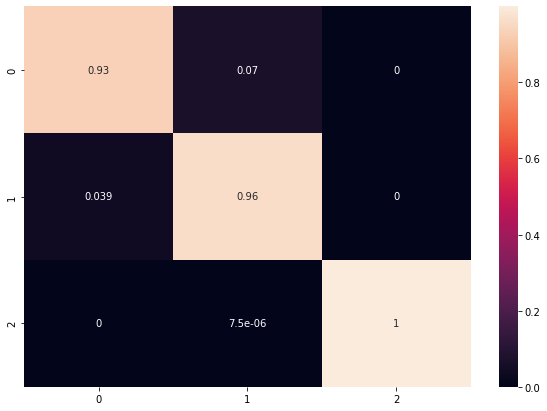

In [19]:
plt.figure(figsize = (10,7))
sn.heatmap(confusionMatrix, annot=True)

In [20]:
print(classification_report(yTest,yPred,target_names=["classZero","classOne","classTwo"]))

              precision    recall  f1-score   support

   classZero       0.91      0.93      0.92     39018
    classOne       0.97      0.96      0.97     93047
    classTwo       1.00      1.00      1.00    134119

    accuracy                           0.98    266184
   macro avg       0.96      0.96      0.96    266184
weighted avg       0.98      0.98      0.98    266184



## Deep learning method

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten,Activation
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot as plt

In [22]:
EPOCHS=10
BATCHSIZE=512

In [23]:
model=Sequential()
model.add(Dense(20,input_dim=xTrain.shape[1],activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                1480      
                                                                 
 dense_1 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,543
Trainable params: 1,543
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist=model.fit(x=np.array(xTrain),y=np.array(yTrain),validation_data=(np.array(xTest),np.array(yTest)),epochs=EPOCHS,batch_size=BATCHSIZE,verbose=1)

Epoch 1/10
1056/1056 [==============================] - 10s 9ms/step - loss: 0.1816 - accuracy: 0.9331 - val_loss: 0.0569 - val_accuracy: 0.9790
Epoch 2/10
1056/1056 [==============================] - 10s 10ms/step - loss: 0.0475 - accuracy: 0.9817 - val_loss: 0.0406 - val_accuracy: 0.9841
Epoch 3/10
1056/1056 [==============================] - 9s 9ms/step - loss: 0.0390 - accuracy: 0.9846 - val_loss: 0.0357 - val_accuracy: 0.9856
Epoch 4/10
1056/1056 [==============================] - 9s 8ms/step - loss: 0.0347 - accuracy: 0.9863 - val_loss: 0.0321 - val_accuracy: 0.9872
Epoch 5/10
1056/1056 [==============================] - 9s 8ms/step - loss: 0.0317 - accuracy: 0.9874 - val_loss: 0.0295 - val_accuracy: 0.9885
Epoch 6/10
1056/1056 [==============================] - 8s 8ms/step - loss: 0.0298 - accuracy: 0.9882 - val_loss: 0.0289 - val_accuracy: 0.9887
Epoch 7/10
1056/1056 [==============================] - 9s 8ms/step - loss: 0.0283 - accuracy: 0.9889 - val_loss: 0.0282 - val_accura

In [31]:
def plotHist():
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title("accuracy deep model for LandDebriIce")
    plt.xlabel('ephocs')
    plt.ylabel('accuracy')
    plt.legend(['train','validation'])
    plt.show()

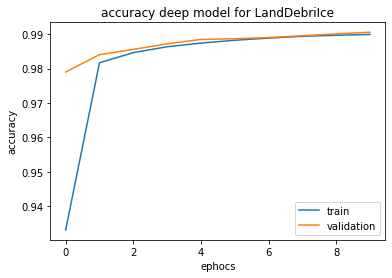

In [32]:
plotHist()

In [33]:
yPred=model.predict(np.array(xTest))
yPred=np.argmax(yPred,axis=1)

In [34]:
confusionMatix=confusion_matrix(yTest,yPred,normalize='true')
print(confusionMatix)

[[9.73755702e-01 2.62186683e-02 2.56291968e-05]
 [1.59166873e-02 9.84051071e-01 3.22417703e-05]
 [1.49121303e-05 1.49121303e-05 9.99970176e-01]]


<AxesSubplot:>

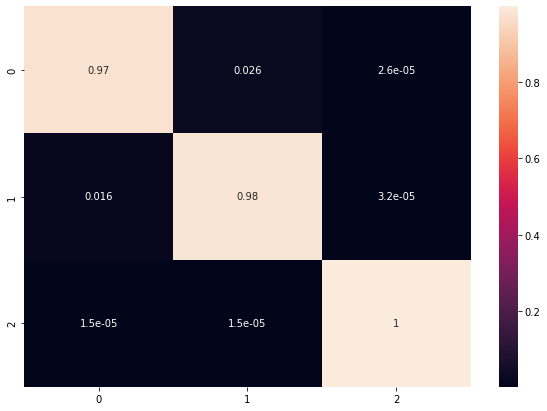

In [35]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatix,annot=True)

In [37]:
print(classification_report(yTest,yPred,target_names=['Land','Debri','Ice']))

              precision    recall  f1-score   support

        Land       0.96      0.97      0.97     39018
       Debri       0.99      0.98      0.99     93047
         Ice       1.00      1.00      1.00    134119

    accuracy                           0.99    266184
   macro avg       0.98      0.99      0.98    266184
weighted avg       0.99      0.99      0.99    266184



## Lets apply some clustering techniques

### K-means


In [38]:
from sklearn.cluster import KMeans

In [39]:
kMeans=KMeans(n_clusters=3,random_state=0)
kMeans.fit(np.array(xTrain))

KMeans(n_clusters=3, random_state=0)

In [40]:
unqiueLabels=np.unique(kMeans.labels_)

In [41]:
yPred=kMeans.predict(np.array(xTest))

In [42]:
confusionMatrix=confusion_matrix(yTest,yPred,normalize='true')

<AxesSubplot:>

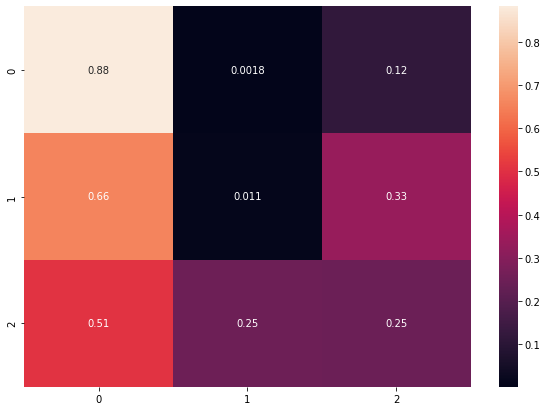

In [43]:
plt.figure(figsize=(10,7))
sn.heatmap(confusionMatrix,annot=True)

In [45]:
print(classification_report(yTest,yPred,target_names=['Land','Debri','Ice']))

              precision    recall  f1-score   support

        Land       0.21      0.88      0.34     39018
       Debri       0.03      0.01      0.02     93047
         Ice       0.48      0.25      0.33    134119

    accuracy                           0.26    266184
   macro avg       0.24      0.38      0.23    266184
weighted avg       0.28      0.26      0.22    266184



In [46]:
df=xTest
df['cluster']=kMeans.predict(np.array(xTest))
centroids = kMeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]

In [47]:
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})


In [48]:
colors = ['#DF2020', '#81DF20', '#2095DF']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

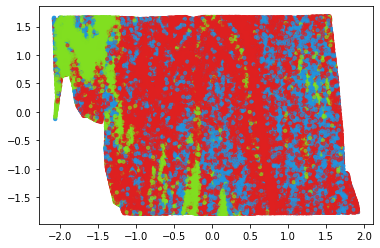

In [49]:
plt.scatter(df.X_Coor, df.Y_Coor, c=df.c, alpha = 0.6, s=10)

In [150]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

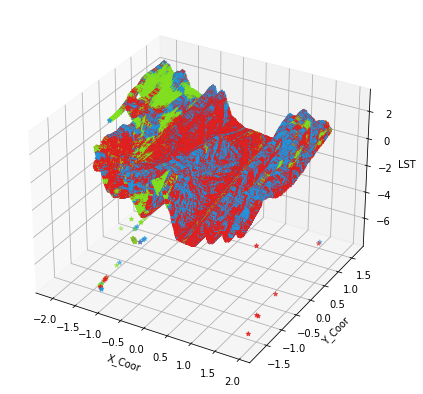

In [54]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter(df.X_Coor, df.Y_Coor, df.Elevation, c=df.c, marker='*')
ax.set_xlabel('X_Coor')
ax.set_ylabel('Y_Coor')
ax.set_zlabel('LST')
plt.show()

### DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
dbClustering=DBSCAN(eps=3,min_samples=2)

In [18]:
dbClustering.fit(xTrain)

DBSCAN(eps=3, min_samples=2)

In [24]:
labels=dbClustering.labels_
uniqueLabels=np.unique(np.array(labels))


1421